# Seaborn Versus Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

**numpy.cumsum()** function is used when we want to compute the cumulative sum of array elements over a given axis.

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

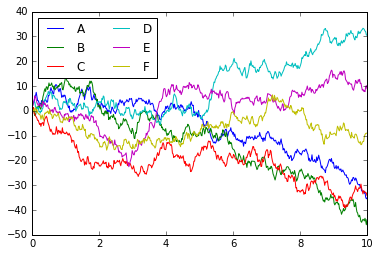

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns
sns.set()

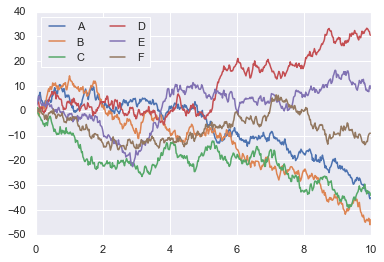

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Exploring Seaborn Plots
The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


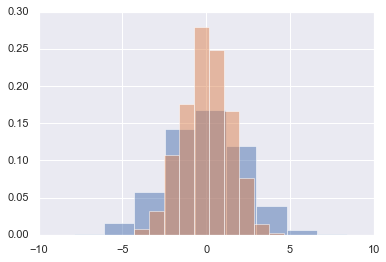

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

With the help of **np.multivariate_normal()** method, we can get the array of multivariate normal values by using np.multivariate_normal() method.

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot

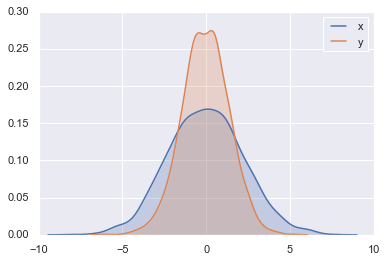

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using distplot

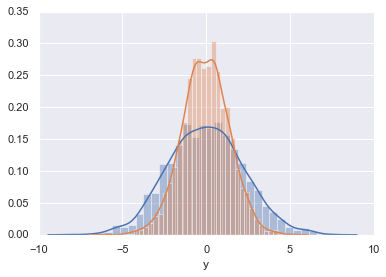

In [9]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:

C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


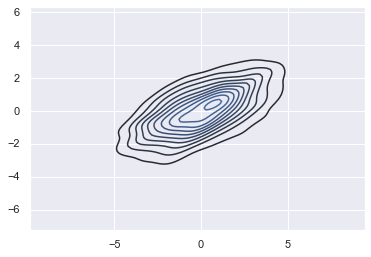

In [10]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using sns.jointplot. For this plot, we'll set the style to a white background:

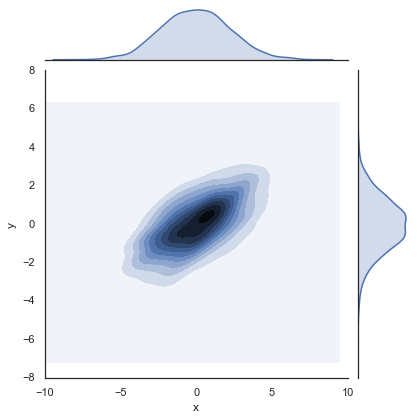

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram instead:

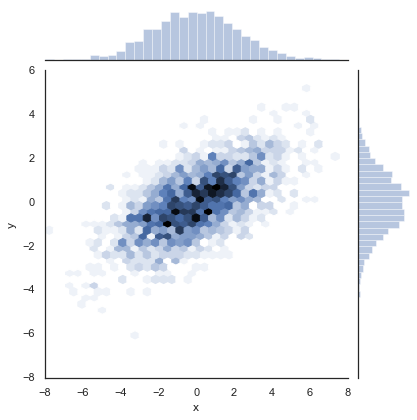

In [12]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [13]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:

C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


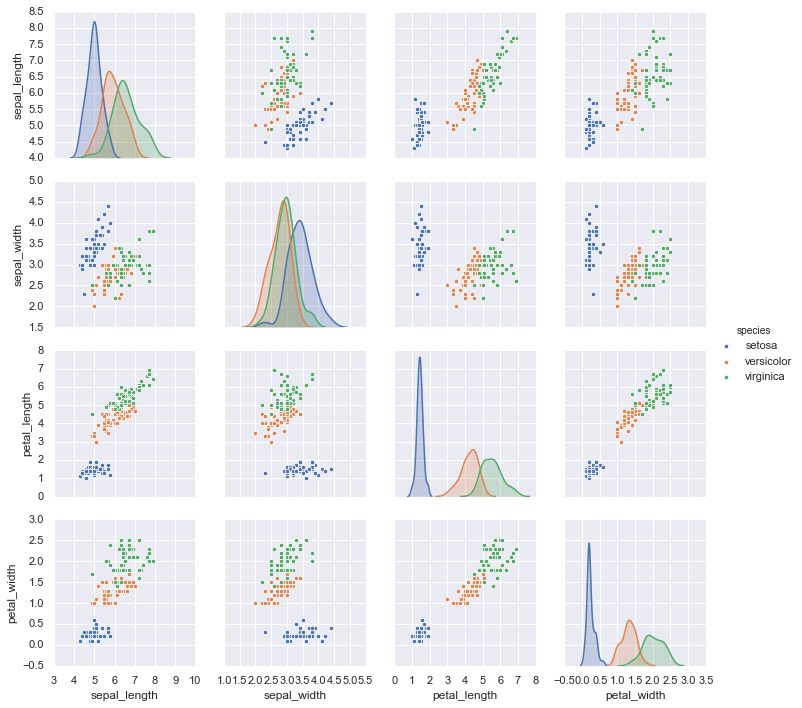

In [14]:
sns.pairplot(iris, hue='species', size=2.5);

 hue parameter determines which column in the data frame should be used for colour encoding. 

## Faceted histograms
Sometimes the best way to view data is via histograms of subsets. Seaborn's FacetGrid makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


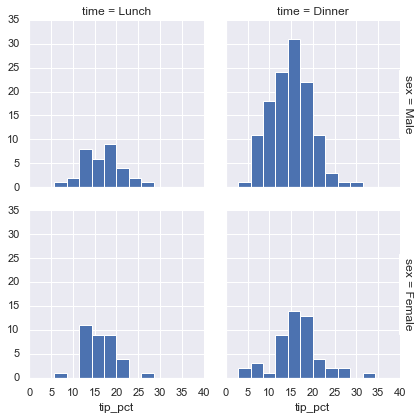

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Factor plots
Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


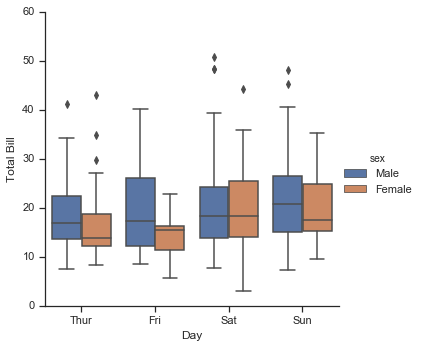

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint distributions
Similar to the pairplot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions:

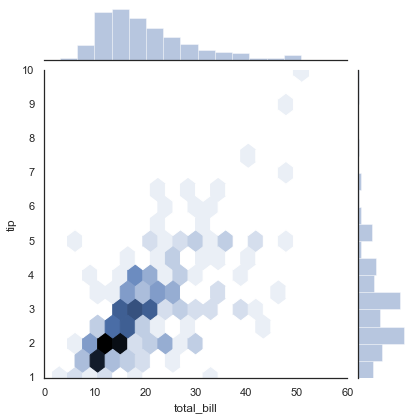

In [18]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

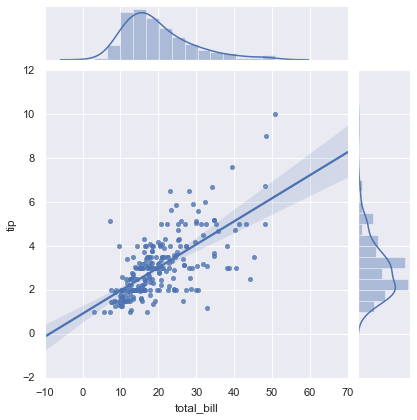

In [19]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## Bar plots
Time series can be plotted using sns.factorplot. In the following example, we'll use the Planets data that we first saw in Aggregation and Grouping:

In [20]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


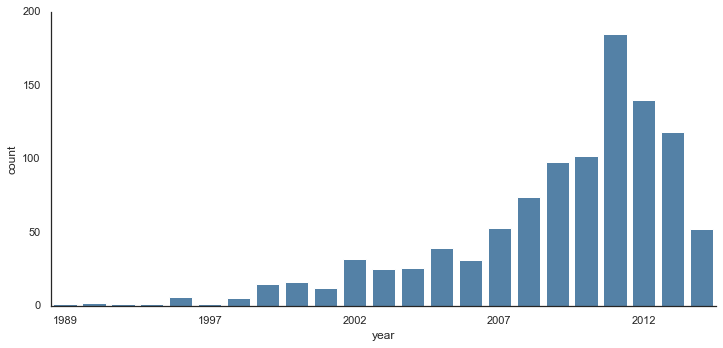

In [21]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

aspect * height gives the width of each facet in inches.

C:\Users\Microsoft\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


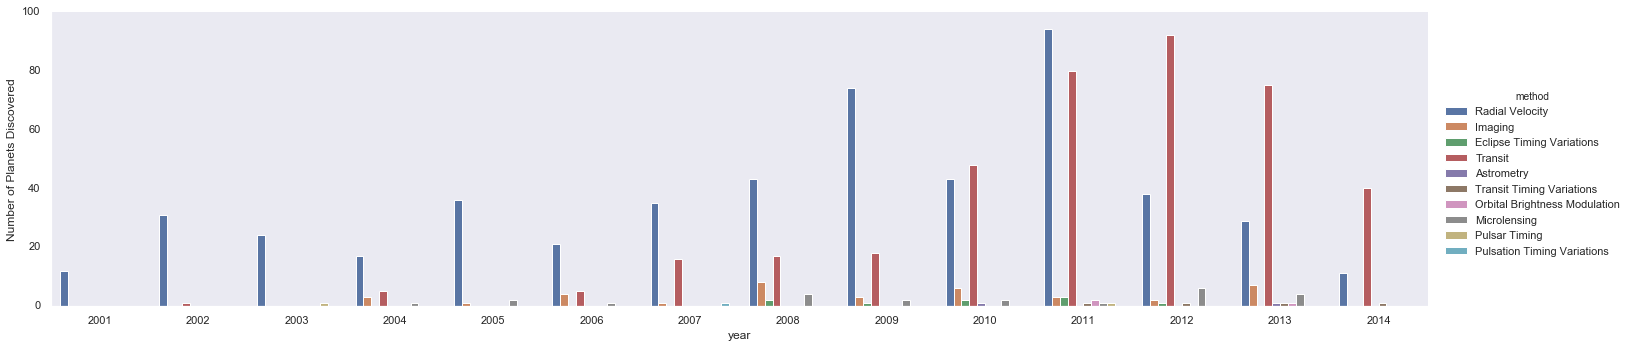

In [24]:
with sns.axes_style('dark'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

# Exploring Marathon Finishing Times
Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon. I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded (if you are interested in using Python for web scraping, I would recommend Web Scraping with Python by Ryan Mitchell). We will start by downloading the data from the Web, and loading it into Pandas:

In [25]:
 !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  836k    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  9  836k    9 80889    0     0  37780      0  0:00:22  0:00:02  0:00:20 38907
 31  836k   31  263k    0     0  85987      0  0:00:09  0:00:03  0:00:06 87719
 57  836k   57  480k    0     0   115k      0  0:00:07  0:00:04  0:00:03  117k
 84  836k   84  710k    0     0   138k      0  0:00:06  0:00:05  0:00:01  145k
100  836k  100  836k    0     0   147k      0  0:00:05  0:00:05 --:--:--  209k


In [26]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
